## 이미지 전처리, OpenCV

In [13]:
# %autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import os
import time

import cv2
# cv2.__version__
import numpy as np
import pandas as pd
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

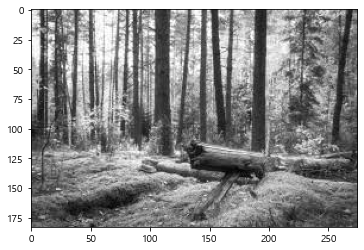

In [14]:
# 흑백으로 이미지를 읽기
image = cv2.imread("./testcv01.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")  # 이미지 출력
plt.axis("on") # 축을 출력하지 말것
plt.show()      # 이미지 출력

In [15]:
print(type(image))
print(image.shape)
print(image[0])

<class 'numpy.ndarray'>
(183, 275)
[246 225 251 246 226 246 255 143  71  52  37 142 172  96 234 233 245 217
 184 141  82  77 121 102  78 196 205 162 177 158 127 149 166 170 150 130
  88  69  84  57  80 127 223 202 183 185 238 200 160  85  91 119 195 223
 255 233 238 218 215 233 244 204 228 242 151 225 205 167 182 193 205 217
 203 127 152 251 179 209 220 172  86  77 124 161 138  99  75  74  87 135
 106 145  74 160 150 107 142 185 153 129 178 170 128 147  94  76  57  50
  54  56  49  41  41  49  99  79  72 140 251 255 231 221 158 170 187 201
 203 201 231 190 176 158  84  72 107 189 221 218 253 239 236 241 233 171
  76  73  89 103 228 250 179  68  44  46  46  41  44 165 223 181 198 195
 189 114 188 189 169  90  69  85 149 209 208 214 239 228 176 155 126 130
 124 132 160 133 173 170 233 255 135  65  40  36  33  34  34  43  41  40
 146 189 189 173 162 203 173 217 200 170 194 197 185 211 180 204 160 119
 160 243 210 221 175 179 156 180 210 237 224 152 141 105  44 113 124 138
 136 159 164 142

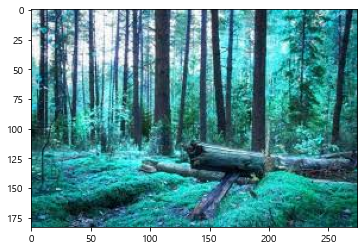

In [16]:
# 흑백으로 이미지를 읽기
image = cv2.imread("./testcv01.jpg", cv2.IMREAD_COLOR)
plt.imshow(image)  # 이미지 출력
plt.axis("on") # 축을 출력하지 말것
plt.show()      # 이미지 출력

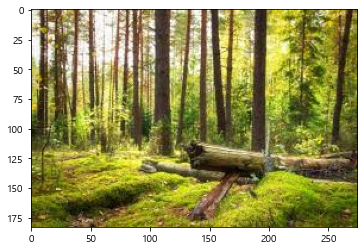

In [18]:
image_bgr = cv2.imread("./testcv01.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # BGR -> RGB
plt.imshow(image_rgb)  # 이미지 출력
plt.axis("on") # 축을 출력하지 말것
plt.show()      # 이미지 출력

In [20]:
print(type(image))
print(image.shape)
# print(image[0])
print(image[0].shape)
print(image[0])

<class 'numpy.ndarray'>
(183, 275, 3)
(275, 3)
[[241 245 250]
 [218 224 229]
 [239 251 255]
 [230 246 252]
 [208 226 233]
 [227 246 253]
 [239 253 255]
 [129 141 153]
 [ 59  67  84]
 [ 41  48  65]
 [ 25  32  52]
 [126 137 157]
 [151 167 190]
 [ 68  92 114]
 [199 232 252]
 [190 233 248]
 [197 248 255]
 [169 221 227]
 [147 185 197]
 [106 141 155]
 [ 47  80  99]
 [ 36  76  95]
 [ 75 119 142]
 [ 56 100 123]
 [ 43  73 102]
 [169 189 220]
 [189 196 229]
 [143 154 186]
 [142 172 199]
 [ 98 158 180]
 [ 38 133 148]
 [ 53 157 170]
 [ 92 170 187]
 [106 171 192]
 [ 90 148 177]
 [ 73 126 159]
 [ 38  82 119]
 [ 23  62 100]
 [ 45  78 111]
 [ 22  52  79]
 [ 52  78  95]
 [102 127 137]
 [200 225 227]
 [181 205 203]
 [165 186 183]
 [167 188 185]
 [222 240 241]
 [181 200 208]
 [135 154 181]
 [ 57  78 110]
 [ 66  84 113]
 [ 96 114 137]
 [174 191 210]
 [205 221 233]
 [241 254 255]
 [222 234 236]
 [229 239 239]
 [211 219 218]
 [211 215 216]
 [229 233 234]
 [242 243 247]
 [202 203 207]
 [228 225 234]
 [238 24

In [22]:
# 파일 목록 출력
path = "./train"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['0.jpg', '1.jpg', '105.jpg', '108.jpg', '11.jpg', '115.jpg', '117.jpg', '120.jpg', '125.jpg', '127.jpg', '133.jpg', '135.jpg', '140.jpg', '145.jpg', '147.jpg', '15.jpg', '155.jpg', '159.jpg', '165.jpg', '17.jpg', '170.jpg', '175.jpg', '182.jpg', '185.jpg', '190.jpg', '193.jpg', '195.jpg', '20.jpg', '205.jpg', '215.jpg', '22.jpg', '220.jpg', '223.jpg', '225.jpg', '23.jpg', '235.jpg', '240.jpg', '245.jpg', '247.jpg', '25.jpg', '250.jpg', '253.jpg', '255.jpg', '29.jpg', '3.jpg', '32.jpg', '35.jpg', '37.jpg', '40.jpg', '43.jpg', '45.jpg', '48.jpg', '5.jpg', '55.jpg', '57.jpg', '6.jpg', '62.jpg', '65.jpg', '7.jpg', '70.jpg', '71.jpg', '75.jpg', '77.jpg', '83.jpg', '85.jpg', '9.jpg', '90.jpg', '93.jpg', '95.jpg', '97.jpg']


In [23]:
# 파일명과 확장자의 분리
y_train = []
for i in range(len(file_list)):
    spt = os.path.splitext(file_list[i])
    # print(spt) # ('0', '.jpg')
    y_train.append(int(spt[0])) # 파일명을 값으로 사용   
    
print(y_train)

[0, 1, 105, 108, 11, 115, 117, 120, 125, 127, 133, 135, 140, 145, 147, 15, 155, 159, 165, 17, 170, 175, 182, 185, 190, 193, 195, 20, 205, 215, 22, 220, 223, 225, 23, 235, 240, 245, 247, 25, 250, 253, 255, 29, 3, 32, 35, 37, 40, 43, 45, 48, 5, 55, 57, 6, 62, 65, 7, 70, 71, 75, 77, 83, 85, 9, 90, 93, 95, 97]


In [24]:
image_bgr = cv2.imread("./train/0.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(type(image_rgb))
print(image_rgb.shape)
print(image_rgb)

<class 'numpy.ndarray'>
(128, 128, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [25]:
image_rgb2 = 255-image_rgb  # 흰색: 255 255 255 -> 0 0 0
print(image_rgb2)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
